In [10]:
import matplotlib.pyplot as plt
import networkx as nx
from pathlib import Path
import re

In [11]:
# we store the directory containing the data in data_dir:
data_dir = Path(".") / "data"

In [6]:
# Ignore articles, pronouns etc.
stop_words = set(['the' 'of', 'and'])

In [7]:
# This example uses regular expressions from the re package
# Construct a network from a text
def co_occurrence_network(text):
    # Create a new network
    G = nx.Graph()
    # Split the text into sentences and iterate through them
    sentences = text.split('.')
    for s in sentences:
        # Remove punctuation and convert to lowercase
        clean = re.sub('[^\w\n ]+', '', s).lower()
        clean = re.sub('_+', '', clean).strip()
        # Create list of words separated by whitespace
        words = re.split('\s+', clean)
        # Create an edge for each pair of words
        for v in words:
            # Update word count, add node if necessary
            try:
                G.nodes[v]['count'] += 1
            except KeyError:
                G.add_node(v)
                G.nodes[v]['count'] = 1
            # Update edge count for each pair of words in this sentence
            for w in words:
                # Skip stop words
                if v == w or v in stop_words or w in stop_words:
                    continue
                # Skip blank space
                if len(v) == 0 or len(w) == 0:
                    continue
                # Add one to the edge's count
                try:
                    G.edges[v, w]['count'] += 1
                except KeyError:
                    # Edge doesn't exist, create it
                    G.add_edge(v, w, count=1)
    return G

In [12]:
# Read the text
with open(data_dir / 'shelley1818' / 'frankenstein.txt') as f:
    text = f.read()
# Create a network from the text
G = co_occurrence_network(text)

In [13]:
pairs = sorted(
    G.edges(data=True),
    key=lambda e: e[2]['count'],
    reverse=True)
pairs[0:10]

[('the', 'of', {'count': 13760}),
 ('the', 'i', {'count': 9822}),
 ('to', 'the', {'count': 7842}),
 ('of', 'i', {'count': 5980}),
 ('the', 'my', {'count': 5744}),
 ('to', 'i', {'count': 5540}),
 ('i', 'my', {'count': 5158}),
 ('the', 'a', {'count': 4978}),
 ('to', 'of', {'count': 4920}),
 ('the', 'in', {'count': 4550})]

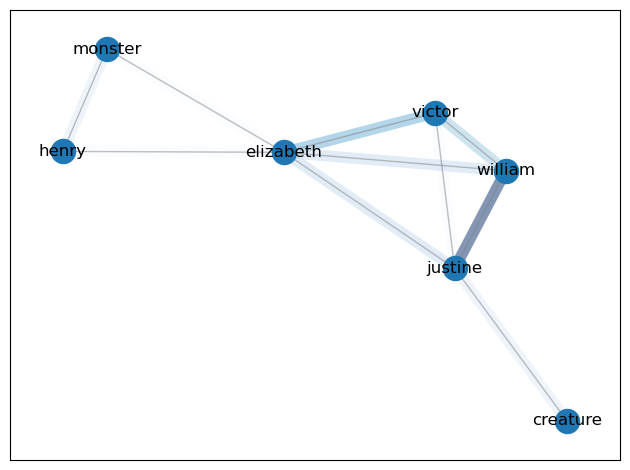

In [15]:
# The subgraph() method of Graph creates a new graph containing a subset of the 
# nodes in the original, as well as any edges between those nodes. 

# Count co-occurrences for characters only
characters = [
    'creature', 'monster', 'victor', 'elizabeth',
    'william', 'henry', 'justine']
G_focus = G.subgraph(characters)
# Create list of edge counts
counts = [G_focus.edges[e]['count'] for e in G_focus.edges]

# Create spring layout
pos = nx.spring_layout(G_focus)

# Create figure and draw nodes
plt.figure()
nx.draw_networkx_nodes(G_focus, pos)
# Draw edges
nx.draw_networkx_edges(
    G_focus, pos, width=8,
    edge_color=counts, edge_cmap=plt.cm.Blues, alpha=0.5)
nx.draw_networkx_edges(G_focus, pos, edge_color="#7f7f7f",alpha=0.5)
# Draw labels
nx.draw_networkx_labels(G_focus, pos)
plt.tight_layout()